In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import os.path
import glob

# Processamento do captcha

## Qualidade da imagem

In [2]:
def processImage(img):    
    imgBorder = cv2.copyMakeBorder(img, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    ret, imgThreshold = cv2.threshold(imgBorder, 127, 255, cv2.THRESH_BINARY)

#     plt.imshow(imgThreshold, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    kernel = np.ones((1,2), np.uint8)
    imgErode = cv2.erode(imgThreshold, kernel, iterations = 1)

#     plt.imshow(imgErode, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    return imgErode


In [3]:
img = cv2.imread("teste.png", 0)

imgErode = processImage(img)

## Encontrando letras

In [4]:
def findLetters(imgErode):
    contours = cv2.findContours(imgErode, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    contours = contours[0]
    imageRegions = []
    areaArr = []

    for contour in contours:
        area = cv2.contourArea(contour)
        areaArr.append(area)
    
    # encontrando mediana da área para descartar áreas incorretas
    median = 0
    areaArr.sort()
    if len(areaArr)%2 != 0:
        mid = int(len(areaArr)/2)
        median = areaArr[mid]
    else:
        mid = int(len(areaArr)/2)
        median = (areaArr[mid] + areaArr[mid - 1])/2
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 3*median or area < median/3:
            continue;

        x, y, w, h = cv2.boundingRect(contour)
        imgRGB = cv2.cvtColor(imgErode,cv2.COLOR_GRAY2RGB)
    
        # se duas letras estiverem juntas
        if w/h > 1.25:
            half_width = int(w/2)
            imageRegions.append((x, y, half_width, h))
            imageRegions.append((x + half_width, y, half_width, h))
        else:
            imageRegions.append((x, y, w, h))
    
    imageRegions = sorted(imageRegions, key=lambda x: x[0])
    
    return imageRegions


In [5]:
def printRegions(imageRegions):
    for point in imageRegions:    
        imgRGB = cv2.cvtColor(imgErode, cv2.COLOR_GRAY2RGB)
        imgRect = cv2.rectangle(imgRGB, (point[0], point[1]), (point[0]+point[2], point[1]+point[3]), (255,0,0), 1)

        plt.imshow(imgRect)
        plt.axis('off')
        plt.show()

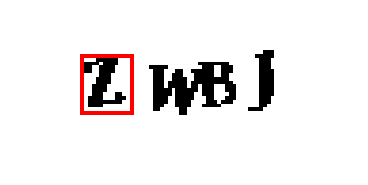

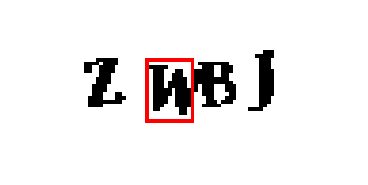

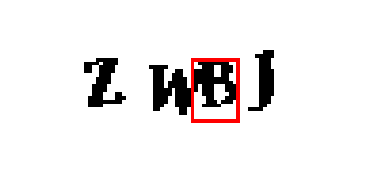

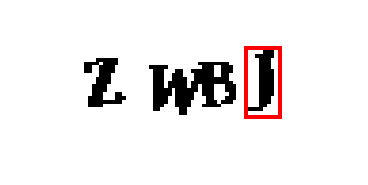

In [6]:
imageRegions = findLetters(imgErode)
printRegions(imageRegions)

## Rodando processamento nos dados

In [7]:
FOLDER_INPUT = "data"
FOLDER_OUTPUT = "data_letters"
captchaImgs = glob.glob(os.path.join(FOLDER_INPUT, "*"))
countLetter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
countNumber = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i, file in enumerate(captchaImgs):
    name = os.path.basename(file)
    captchaText = os.path.splitext(name)[0] # pegando só texto (sem ".png")
    pathImg = "data/" + name
    print("Processando", i, "de", len(captchaImgs), "-", pathImg)
    
    img = cv2.imread(pathImg, 0)
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    imgErode = processImage(img)
    
    imageRegions = findLetters(imgErode)
#     printRegions(imageRegions)
    if len(imageRegions) != 4:
        continue;
        
    for points, letter in zip(imageRegions, captchaText):
        x, y, w, h = points
        
        imageSave = imgErode[y:y + h, x:x + w]
        
#         plt.imshow(imageSave)
#         plt.axis('off')
#         plt.show()
        
        pathSave = os.path.join(FOLDER_OUTPUT, letter)
    
        if not os.path.exists(pathSave):
            os.makedirs(pathSave)
        
        ans = ord(letter)

        if ans >= 0 and ans < ord('A'):
            idx = ans - ord('0')
            countNumber[idx] = countNumber[idx] + 1
            strImgPath = str(countNumber[idx]) + ".png"
        else:
            idx = ans - ord('A')
            countLetter[idx] = countLetter[idx] + 1
            strImgPath = str(countLetter[idx]) + ".png"
        
#         print(strImgPath)
        pt = os.path.join(pathSave, strImgPath)
        cv2.imwrite(pt, imageSave)


Processando 0 de 9955 - data/32Q4.png
Processando 1 de 9955 - data/97SX.png
Processando 2 de 9955 - data/9K8W.png
Processando 3 de 9955 - data/WV2B.png
Processando 4 de 9955 - data/5M8F.png
Processando 5 de 9955 - data/G5P5.png
Processando 6 de 9955 - data/6Q7B.png
Processando 7 de 9955 - data/26WY.png
Processando 8 de 9955 - data/D7TD.png
Processando 9 de 9955 - data/CEDZ.png
Processando 10 de 9955 - data/56WP.png
Processando 11 de 9955 - data/NLS3.png
Processando 12 de 9955 - data/X28L.png
Processando 13 de 9955 - data/D5M2.png
Processando 14 de 9955 - data/5VXL.png
Processando 15 de 9955 - data/JE2F.png
Processando 16 de 9955 - data/4NL5.png
Processando 17 de 9955 - data/ACG4.png
Processando 18 de 9955 - data/394X.png
Processando 19 de 9955 - data/4GGZ.png
Processando 20 de 9955 - data/TZL8.png
Processando 21 de 9955 - data/WJTN.png
Processando 22 de 9955 - data/LVCM.png
Processando 23 de 9955 - data/LACW.png
Processando 24 de 9955 - data/YV3C.png
Processando 25 de 9955 - data/C5MZ.

Processando 282 de 9955 - data/X8WB.png
Processando 283 de 9955 - data/W7AM.png
Processando 284 de 9955 - data/HRHJ.png
Processando 285 de 9955 - data/PUT5.png
Processando 286 de 9955 - data/FYYM.png
Processando 287 de 9955 - data/YRP7.png
Processando 288 de 9955 - data/VFPT.png
Processando 289 de 9955 - data/Q33G.png
Processando 290 de 9955 - data/AL4Q.png
Processando 291 de 9955 - data/463Z.png
Processando 292 de 9955 - data/MCKA.png
Processando 293 de 9955 - data/3SUN.png
Processando 294 de 9955 - data/7SKL.png
Processando 295 de 9955 - data/PN5M.png
Processando 296 de 9955 - data/9MB5.png
Processando 297 de 9955 - data/QATE.png
Processando 298 de 9955 - data/FNXR.png
Processando 299 de 9955 - data/HEJN.png
Processando 300 de 9955 - data/ABMW.png
Processando 301 de 9955 - data/22BJ.png
Processando 302 de 9955 - data/NTVJ.png
Processando 303 de 9955 - data/8EPP.png
Processando 304 de 9955 - data/C3CA.png
Processando 305 de 9955 - data/HPS5.png
Processando 306 de 9955 - data/5GUV.png


Processando 494 de 9955 - data/NPY7.png
Processando 495 de 9955 - data/L8XM.png
Processando 496 de 9955 - data/8D4E.png
Processando 497 de 9955 - data/CBXS.png
Processando 498 de 9955 - data/WZJU.png
Processando 499 de 9955 - data/PQYV.png
Processando 500 de 9955 - data/K6VW.png
Processando 501 de 9955 - data/J9AN.png
Processando 502 de 9955 - data/RNV9.png
Processando 503 de 9955 - data/Z3SR.png
Processando 504 de 9955 - data/9KV6.png
Processando 505 de 9955 - data/Z852.png
Processando 506 de 9955 - data/WXRQ.png
Processando 507 de 9955 - data/GGX2.png
Processando 508 de 9955 - data/6SCY.png
Processando 509 de 9955 - data/UU6L.png
Processando 510 de 9955 - data/3B7F.png
Processando 511 de 9955 - data/FA2T.png
Processando 512 de 9955 - data/92WB.png
Processando 513 de 9955 - data/E4N7.png
Processando 514 de 9955 - data/C2Q2.png
Processando 515 de 9955 - data/KTB5.png
Processando 516 de 9955 - data/A4PT.png
Processando 517 de 9955 - data/3KHP.png
Processando 518 de 9955 - data/G2LJ.png


Processando 712 de 9955 - data/JN6F.png
Processando 713 de 9955 - data/T4X5.png
Processando 714 de 9955 - data/6TJ3.png
Processando 715 de 9955 - data/QBRR.png
Processando 716 de 9955 - data/LVTG.png
Processando 717 de 9955 - data/R56T.png
Processando 718 de 9955 - data/Z8NF.png
Processando 719 de 9955 - data/R2FB.png
Processando 720 de 9955 - data/ZXC3.png
Processando 721 de 9955 - data/ZXCR.png
Processando 722 de 9955 - data/VNFD.png
Processando 723 de 9955 - data/PM2H.png
Processando 724 de 9955 - data/ZHFU.png
Processando 725 de 9955 - data/TDQT.png
Processando 726 de 9955 - data/FSTB.png
Processando 727 de 9955 - data/XKX5.png
Processando 728 de 9955 - data/P4FA.png
Processando 729 de 9955 - data/S88M.png
Processando 730 de 9955 - data/YREC.png
Processando 731 de 9955 - data/EEBX.png
Processando 732 de 9955 - data/KGXQ.png
Processando 733 de 9955 - data/8YWP.png
Processando 734 de 9955 - data/AGGE.png
Processando 735 de 9955 - data/5NKL.png
Processando 736 de 9955 - data/SP79.png


Processando 933 de 9955 - data/GV43.png
Processando 934 de 9955 - data/YYLQ.png
Processando 935 de 9955 - data/X6UG.png
Processando 936 de 9955 - data/A9ZY.png
Processando 937 de 9955 - data/S7QF.png
Processando 938 de 9955 - data/CJNT.png
Processando 939 de 9955 - data/JCDE.png
Processando 940 de 9955 - data/7AYB.png
Processando 941 de 9955 - data/3XJ3.png
Processando 942 de 9955 - data/KKVA.png
Processando 943 de 9955 - data/P7L7.png
Processando 944 de 9955 - data/EWRJ.png
Processando 945 de 9955 - data/RZFY.png
Processando 946 de 9955 - data/NAWU.png
Processando 947 de 9955 - data/Y9U6.png
Processando 948 de 9955 - data/ZEUX.png
Processando 949 de 9955 - data/E5GZ.png
Processando 950 de 9955 - data/CDUQ.png
Processando 951 de 9955 - data/6L5Y.png
Processando 952 de 9955 - data/RDNV.png
Processando 953 de 9955 - data/S2ZR.png
Processando 954 de 9955 - data/TG9A.png
Processando 955 de 9955 - data/98MD.png
Processando 956 de 9955 - data/UVR9.png
Processando 957 de 9955 - data/W2E5.png


Processando 1234 de 9955 - data/DYYN.png
Processando 1235 de 9955 - data/PSVK.png
Processando 1236 de 9955 - data/D9TZ.png
Processando 1237 de 9955 - data/DLAP.png
Processando 1238 de 9955 - data/JEKH.png
Processando 1239 de 9955 - data/7K6H.png
Processando 1240 de 9955 - data/FTHX.png
Processando 1241 de 9955 - data/5JGY.png
Processando 1242 de 9955 - data/KSRX.png
Processando 1243 de 9955 - data/7UH6.png
Processando 1244 de 9955 - data/H8Q7.png
Processando 1245 de 9955 - data/SM46.png
Processando 1246 de 9955 - data/2TNL.png
Processando 1247 de 9955 - data/MLBG.png
Processando 1248 de 9955 - data/BCW2.png
Processando 1249 de 9955 - data/HVP8.png
Processando 1250 de 9955 - data/FVR5.png
Processando 1251 de 9955 - data/MBL5.png
Processando 1252 de 9955 - data/DPS2.png
Processando 1253 de 9955 - data/6FMM.png
Processando 1254 de 9955 - data/HZ3E.png
Processando 1255 de 9955 - data/2Z5T.png
Processando 1256 de 9955 - data/GRVG.png
Processando 1257 de 9955 - data/KCWH.png
Processando 1258

Processando 1472 de 9955 - data/9J2R.png
Processando 1473 de 9955 - data/D3AG.png
Processando 1474 de 9955 - data/SGU3.png
Processando 1475 de 9955 - data/4FNS.png
Processando 1476 de 9955 - data/LWJD.png
Processando 1477 de 9955 - data/XFPW.png
Processando 1478 de 9955 - data/FEKH.png
Processando 1479 de 9955 - data/UFM4.png
Processando 1480 de 9955 - data/AULY.png
Processando 1481 de 9955 - data/A5AM.png
Processando 1482 de 9955 - data/9SH5.png
Processando 1483 de 9955 - data/DZF8.png
Processando 1484 de 9955 - data/3F9N.png
Processando 1485 de 9955 - data/226U.png
Processando 1486 de 9955 - data/P7A4.png
Processando 1487 de 9955 - data/Q8UW.png
Processando 1488 de 9955 - data/3Q95.png
Processando 1489 de 9955 - data/B9JJ.png
Processando 1490 de 9955 - data/9SH4.png
Processando 1491 de 9955 - data/9M5Q.png
Processando 1492 de 9955 - data/DCHQ.png
Processando 1493 de 9955 - data/B72H.png
Processando 1494 de 9955 - data/SE9X.png
Processando 1495 de 9955 - data/98UP.png
Processando 1496

Processando 1701 de 9955 - data/N5K4.png
Processando 1702 de 9955 - data/HHLR.png
Processando 1703 de 9955 - data/TV5L.png
Processando 1704 de 9955 - data/NKM4.png
Processando 1705 de 9955 - data/QLRY.png
Processando 1706 de 9955 - data/Z8B7.png
Processando 1707 de 9955 - data/JG2C.png
Processando 1708 de 9955 - data/DYMJ.png
Processando 1709 de 9955 - data/7PC4.png
Processando 1710 de 9955 - data/NBFL.png
Processando 1711 de 9955 - data/7PCU.png
Processando 1712 de 9955 - data/QPBE.png
Processando 1713 de 9955 - data/AVEU.png
Processando 1714 de 9955 - data/CLTY.png
Processando 1715 de 9955 - data/8D5G.png
Processando 1716 de 9955 - data/66QM.png
Processando 1717 de 9955 - data/49N3.png
Processando 1718 de 9955 - data/B88D.png
Processando 1719 de 9955 - data/3Y6D.png
Processando 1720 de 9955 - data/8FNE.png
Processando 1721 de 9955 - data/R5Y4.png
Processando 1722 de 9955 - data/AZF5.png
Processando 1723 de 9955 - data/BDPP.png
Processando 1724 de 9955 - data/7LE2.png
Processando 1725

Processando 1922 de 9955 - data/YHV2.png
Processando 1923 de 9955 - data/TZTM.png
Processando 1924 de 9955 - data/PXRK.png
Processando 1925 de 9955 - data/L6U7.png
Processando 1926 de 9955 - data/GYS5.png
Processando 1927 de 9955 - data/DN8N.png
Processando 1928 de 9955 - data/DGEP.png
Processando 1929 de 9955 - data/QYJE.png
Processando 1930 de 9955 - data/LAZG.png
Processando 1931 de 9955 - data/4KKF.png
Processando 1932 de 9955 - data/GK9C.png
Processando 1933 de 9955 - data/H4RT.png
Processando 1934 de 9955 - data/7YK4.png
Processando 1935 de 9955 - data/XEXJ.png
Processando 1936 de 9955 - data/FJVY.png
Processando 1937 de 9955 - data/LC4S.png
Processando 1938 de 9955 - data/BDFH.png
Processando 1939 de 9955 - data/C79E.png
Processando 1940 de 9955 - data/92WF.png
Processando 1941 de 9955 - data/EXXA.png
Processando 1942 de 9955 - data/WMFH.png
Processando 1943 de 9955 - data/XKXR.png
Processando 1944 de 9955 - data/YFT5.png
Processando 1945 de 9955 - data/2H2Z.png
Processando 1946

Processando 2135 de 9955 - data/FGSN.png
Processando 2136 de 9955 - data/FGPU.png
Processando 2137 de 9955 - data/ABME.png
Processando 2138 de 9955 - data/SRNU.png
Processando 2139 de 9955 - data/LYD4.png
Processando 2140 de 9955 - data/H9WC.png
Processando 2141 de 9955 - data/DDLK.png
Processando 2142 de 9955 - data/RJY7.png
Processando 2143 de 9955 - data/5PWA.png
Processando 2144 de 9955 - data/9J2P.png
Processando 2145 de 9955 - data/8LXW.png
Processando 2146 de 9955 - data/7CLG.png
Processando 2147 de 9955 - data/VSHY.png
Processando 2148 de 9955 - data/GH3C.png
Processando 2149 de 9955 - data/Q8UU.png
Processando 2150 de 9955 - data/P7BL.png
Processando 2151 de 9955 - data/BP98.png
Processando 2152 de 9955 - data/EYGU.png
Processando 2153 de 9955 - data/FU9Y.png
Processando 2154 de 9955 - data/6GHT.png
Processando 2155 de 9955 - data/2RM2.png
Processando 2156 de 9955 - data/JD9R.png
Processando 2157 de 9955 - data/EP8C.png
Processando 2158 de 9955 - data/RTQN.png
Processando 2159

Processando 2362 de 9955 - data/MWCV.png
Processando 2363 de 9955 - data/4EET.png
Processando 2364 de 9955 - data/Z6LF.png
Processando 2365 de 9955 - data/LJJW.png
Processando 2366 de 9955 - data/9GBM.png
Processando 2367 de 9955 - data/R7T2.png
Processando 2368 de 9955 - data/7PCA.png
Processando 2369 de 9955 - data/5CZX.png
Processando 2370 de 9955 - data/A6KN.png
Processando 2371 de 9955 - data/AF67.png
Processando 2372 de 9955 - data/W38R.png
Processando 2373 de 9955 - data/MW5F.png
Processando 2374 de 9955 - data/2FEW.png
Processando 2375 de 9955 - data/Y4KM.png
Processando 2376 de 9955 - data/ETBC.png
Processando 2377 de 9955 - data/FQBJ.png
Processando 2378 de 9955 - data/U2HG.png
Processando 2379 de 9955 - data/AZRR.png
Processando 2380 de 9955 - data/YXPN.png
Processando 2381 de 9955 - data/GYS4.png
Processando 2382 de 9955 - data/TMTV.png
Processando 2383 de 9955 - data/LVXC.png
Processando 2384 de 9955 - data/CYMW.png
Processando 2385 de 9955 - data/NKLR.png
Processando 2386

Processando 2602 de 9955 - data/VN7G.png
Processando 2603 de 9955 - data/A65E.png
Processando 2604 de 9955 - data/B4FA.png
Processando 2605 de 9955 - data/4RMU.png
Processando 2606 de 9955 - data/L37A.png
Processando 2607 de 9955 - data/5QND.png
Processando 2608 de 9955 - data/42AE.png
Processando 2609 de 9955 - data/GBNX.png
Processando 2610 de 9955 - data/QGKT.png
Processando 2611 de 9955 - data/56E7.png
Processando 2612 de 9955 - data/BM2H.png
Processando 2613 de 9955 - data/METQ.png
Processando 2614 de 9955 - data/RLEN.png
Processando 2615 de 9955 - data/LSLR.png
Processando 2616 de 9955 - data/5Q9G.png
Processando 2617 de 9955 - data/VUTV.png
Processando 2618 de 9955 - data/V99E.png
Processando 2619 de 9955 - data/FMYV.png
Processando 2620 de 9955 - data/ZXER.png
Processando 2621 de 9955 - data/JEWT.png
Processando 2622 de 9955 - data/PVT4.png
Processando 2623 de 9955 - data/B4G3.png
Processando 2624 de 9955 - data/EMDF.png
Processando 2625 de 9955 - data/ZHCN.png
Processando 2626

Processando 2847 de 9955 - data/5KHR.png
Processando 2848 de 9955 - data/4X9P.png
Processando 2849 de 9955 - data/RA5R.png
Processando 2850 de 9955 - data/LG3T.png
Processando 2851 de 9955 - data/KGEM.png
Processando 2852 de 9955 - data/BG3F.png
Processando 2853 de 9955 - data/EKSH.png
Processando 2854 de 9955 - data/D3JD.png
Processando 2855 de 9955 - data/939W.png
Processando 2856 de 9955 - data/CXWH.png
Processando 2857 de 9955 - data/3JP4.png
Processando 2858 de 9955 - data/3JSN.png
Processando 2859 de 9955 - data/5R25.png
Processando 2860 de 9955 - data/XS6A.png
Processando 2861 de 9955 - data/ELUN.png
Processando 2862 de 9955 - data/L79X.png
Processando 2863 de 9955 - data/9CQ8.png
Processando 2864 de 9955 - data/L9TM.png
Processando 2865 de 9955 - data/DVLD.png
Processando 2866 de 9955 - data/ND8C.png
Processando 2867 de 9955 - data/WE8J.png
Processando 2868 de 9955 - data/YBJQ.png
Processando 2869 de 9955 - data/H72L.png
Processando 2870 de 9955 - data/PGUL.png
Processando 2871

Processando 3096 de 9955 - data/CPXY.png
Processando 3097 de 9955 - data/J7R5.png
Processando 3098 de 9955 - data/RGAY.png
Processando 3099 de 9955 - data/E3UL.png
Processando 3100 de 9955 - data/LMQH.png
Processando 3101 de 9955 - data/PZUH.png
Processando 3102 de 9955 - data/N2SR.png
Processando 3103 de 9955 - data/W85Z.png
Processando 3104 de 9955 - data/3NKN.png
Processando 3105 de 9955 - data/YABZ.png
Processando 3106 de 9955 - data/7REG.png
Processando 3107 de 9955 - data/G976.png
Processando 3108 de 9955 - data/JR65.png
Processando 3109 de 9955 - data/DK9K.png
Processando 3110 de 9955 - data/HT72.png
Processando 3111 de 9955 - data/L83V.png
Processando 3112 de 9955 - data/XWY4.png
Processando 3113 de 9955 - data/2QX5.png
Processando 3114 de 9955 - data/FDGM.png
Processando 3115 de 9955 - data/Q58Q.png
Processando 3116 de 9955 - data/YA64.png
Processando 3117 de 9955 - data/FCBP.png
Processando 3118 de 9955 - data/68CW.png
Processando 3119 de 9955 - data/HVXC.png
Processando 3120

Processando 3314 de 9955 - data/276W.png
Processando 3315 de 9955 - data/JCVU.png
Processando 3316 de 9955 - data/9HBQ.png
Processando 3317 de 9955 - data/GQWP.png
Processando 3318 de 9955 - data/HY2R.png
Processando 3319 de 9955 - data/9FLB.png
Processando 3320 de 9955 - data/EUN2.png
Processando 3321 de 9955 - data/QHBW.png
Processando 3322 de 9955 - data/VH4N.png
Processando 3323 de 9955 - data/X63X.png
Processando 3324 de 9955 - data/JQK7.png
Processando 3325 de 9955 - data/2UTD.png
Processando 3326 de 9955 - data/6K4Y.png
Processando 3327 de 9955 - data/5Y6U.png
Processando 3328 de 9955 - data/UAUD.png
Processando 3329 de 9955 - data/A72U.png
Processando 3330 de 9955 - data/RT8X.png
Processando 3331 de 9955 - data/SLYK.png
Processando 3332 de 9955 - data/LL6Q.png
Processando 3333 de 9955 - data/UJEU.png
Processando 3334 de 9955 - data/DC5A.png
Processando 3335 de 9955 - data/YPCB.png
Processando 3336 de 9955 - data/NSYB.png
Processando 3337 de 9955 - data/P5RP.png
Processando 3338

Processando 3549 de 9955 - data/NZHT.png
Processando 3550 de 9955 - data/6PY4.png
Processando 3551 de 9955 - data/JXN3.png
Processando 3552 de 9955 - data/55UL.png
Processando 3553 de 9955 - data/AG7W.png
Processando 3554 de 9955 - data/V4S5.png
Processando 3555 de 9955 - data/9QCV.png
Processando 3556 de 9955 - data/5NNU.png
Processando 3557 de 9955 - data/E7WV.png
Processando 3558 de 9955 - data/2PFS.png
Processando 3559 de 9955 - data/SBYR.png
Processando 3560 de 9955 - data/TKRU.png
Processando 3561 de 9955 - data/9HND.png
Processando 3562 de 9955 - data/C6N4.png
Processando 3563 de 9955 - data/G4H2.png
Processando 3564 de 9955 - data/5JZC.png
Processando 3565 de 9955 - data/X76B.png
Processando 3566 de 9955 - data/TTS4.png
Processando 3567 de 9955 - data/Y44W.png
Processando 3568 de 9955 - data/BD8W.png
Processando 3569 de 9955 - data/PVU2.png
Processando 3570 de 9955 - data/KMGM.png
Processando 3571 de 9955 - data/ETHR.png
Processando 3572 de 9955 - data/YMBA.png
Processando 3573

Processando 3809 de 9955 - data/XRJ4.png
Processando 3810 de 9955 - data/TMG7.png
Processando 3811 de 9955 - data/SDLQ.png
Processando 3812 de 9955 - data/LCPF.png
Processando 3813 de 9955 - data/EJZ6.png
Processando 3814 de 9955 - data/KJZE.png
Processando 3815 de 9955 - data/MBK2.png
Processando 3816 de 9955 - data/66AB.png
Processando 3817 de 9955 - data/ZMGD.png
Processando 3818 de 9955 - data/HM49.png
Processando 3819 de 9955 - data/EAKB.png
Processando 3820 de 9955 - data/BDVR.png
Processando 3821 de 9955 - data/ML3P.png
Processando 3822 de 9955 - data/D9RN.png
Processando 3823 de 9955 - data/95W6.png
Processando 3824 de 9955 - data/PS38.png
Processando 3825 de 9955 - data/YSD7.png
Processando 3826 de 9955 - data/LTDN.png
Processando 3827 de 9955 - data/ED7B.png
Processando 3828 de 9955 - data/J9GJ.png
Processando 3829 de 9955 - data/AVB2.png
Processando 3830 de 9955 - data/ETD4.png
Processando 3831 de 9955 - data/N5LD.png
Processando 3832 de 9955 - data/47QJ.png
Processando 3833

Processando 4072 de 9955 - data/WG9J.png
Processando 4073 de 9955 - data/KUUX.png
Processando 4074 de 9955 - data/5233.png
Processando 4075 de 9955 - data/7M2S.png
Processando 4076 de 9955 - data/ZKFP.png
Processando 4077 de 9955 - data/B995.png
Processando 4078 de 9955 - data/KNAJ.png
Processando 4079 de 9955 - data/PPM7.png
Processando 4080 de 9955 - data/S5CP.png
Processando 4081 de 9955 - data/P9HW.png
Processando 4082 de 9955 - data/CZAA.png
Processando 4083 de 9955 - data/FK6E.png
Processando 4084 de 9955 - data/466E.png
Processando 4085 de 9955 - data/D47D.png
Processando 4086 de 9955 - data/JFPU.png
Processando 4087 de 9955 - data/78SV.png
Processando 4088 de 9955 - data/EKSN.png
Processando 4089 de 9955 - data/3XMP.png
Processando 4090 de 9955 - data/C8ZZ.png
Processando 4091 de 9955 - data/C4LM.png
Processando 4092 de 9955 - data/TR3K.png
Processando 4093 de 9955 - data/PNK3.png
Processando 4094 de 9955 - data/NJVK.png
Processando 4095 de 9955 - data/UZTD.png
Processando 4096

Processando 4393 de 9955 - data/SFXU.png
Processando 4394 de 9955 - data/TD52.png
Processando 4395 de 9955 - data/FCCR.png
Processando 4396 de 9955 - data/3G6V.png
Processando 4397 de 9955 - data/EV3W.png
Processando 4398 de 9955 - data/RP74.png
Processando 4399 de 9955 - data/9EGV.png
Processando 4400 de 9955 - data/FT5X.png
Processando 4401 de 9955 - data/3734.png
Processando 4402 de 9955 - data/A8U3.png
Processando 4403 de 9955 - data/EQNQ.png
Processando 4404 de 9955 - data/8ZX9.png
Processando 4405 de 9955 - data/NESJ.png
Processando 4406 de 9955 - data/37EE.png
Processando 4407 de 9955 - data/ASHW.png
Processando 4408 de 9955 - data/VPS2.png
Processando 4409 de 9955 - data/ZCHG.png
Processando 4410 de 9955 - data/CWPP.png
Processando 4411 de 9955 - data/2D8W.png
Processando 4412 de 9955 - data/6TVY.png
Processando 4413 de 9955 - data/9U84.png
Processando 4414 de 9955 - data/LQMQ.png
Processando 4415 de 9955 - data/W4ZT.png
Processando 4416 de 9955 - data/PA9G.png
Processando 4417

Processando 4640 de 9955 - data/DJ38.png
Processando 4641 de 9955 - data/X8QD.png
Processando 4642 de 9955 - data/A5GZ.png
Processando 4643 de 9955 - data/F5GS.png
Processando 4644 de 9955 - data/EY7P.png
Processando 4645 de 9955 - data/WKZT.png
Processando 4646 de 9955 - data/L5XG.png
Processando 4647 de 9955 - data/M4AM.png
Processando 4648 de 9955 - data/QTHC.png
Processando 4649 de 9955 - data/BNAS.png
Processando 4650 de 9955 - data/3ZZY.png
Processando 4651 de 9955 - data/B5XU.png
Processando 4652 de 9955 - data/U6BU.png
Processando 4653 de 9955 - data/ZBL9.png
Processando 4654 de 9955 - data/L5ZX.png
Processando 4655 de 9955 - data/JM67.png
Processando 4656 de 9955 - data/YY2N.png
Processando 4657 de 9955 - data/2LA7.png
Processando 4658 de 9955 - data/AEMV.png
Processando 4659 de 9955 - data/P7FF.png
Processando 4660 de 9955 - data/H9QV.png
Processando 4661 de 9955 - data/365U.png
Processando 4662 de 9955 - data/3654.png
Processando 4663 de 9955 - data/XD8T.png
Processando 4664

Processando 4885 de 9955 - data/GYT3.png
Processando 4886 de 9955 - data/NKHN.png
Processando 4887 de 9955 - data/G7W4.png
Processando 4888 de 9955 - data/FCYJ.png
Processando 4889 de 9955 - data/5JUJ.png
Processando 4890 de 9955 - data/ZQ6C.png
Processando 4891 de 9955 - data/LXSH.png
Processando 4892 de 9955 - data/SAGP.png
Processando 4893 de 9955 - data/NUAE.png
Processando 4894 de 9955 - data/JLRU.png
Processando 4895 de 9955 - data/2DXK.png
Processando 4896 de 9955 - data/83HY.png
Processando 4897 de 9955 - data/KS7H.png
Processando 4898 de 9955 - data/XNNN.png
Processando 4899 de 9955 - data/URAX.png
Processando 4900 de 9955 - data/PAXH.png
Processando 4901 de 9955 - data/37PE.png
Processando 4902 de 9955 - data/ZMRP.png
Processando 4903 de 9955 - data/LMHZ.png
Processando 4904 de 9955 - data/8SG3.png
Processando 4905 de 9955 - data/JP7B.png
Processando 4906 de 9955 - data/ZA32.png
Processando 4907 de 9955 - data/NRRB.png
Processando 4908 de 9955 - data/97X9.png
Processando 4909

Processando 5129 de 9955 - data/6CLA.png
Processando 5130 de 9955 - data/U5DL.png
Processando 5131 de 9955 - data/KTJC.png
Processando 5132 de 9955 - data/Q993.png
Processando 5133 de 9955 - data/5CRJ.png
Processando 5134 de 9955 - data/ECHT.png
Processando 5135 de 9955 - data/JBSS.png
Processando 5136 de 9955 - data/7JWJ.png
Processando 5137 de 9955 - data/XXJF.png
Processando 5138 de 9955 - data/D8CH.png
Processando 5139 de 9955 - data/JVAY.png
Processando 5140 de 9955 - data/2GF4.png
Processando 5141 de 9955 - data/YNPM.png
Processando 5142 de 9955 - data/DVCT.png
Processando 5143 de 9955 - data/PNQ3.png
Processando 5144 de 9955 - data/2YMA.png
Processando 5145 de 9955 - data/2P3D.png
Processando 5146 de 9955 - data/CMTT.png
Processando 5147 de 9955 - data/87PV.png
Processando 5148 de 9955 - data/8BFG.png
Processando 5149 de 9955 - data/VJWW.png
Processando 5150 de 9955 - data/A7HL.png
Processando 5151 de 9955 - data/N6SK.png
Processando 5152 de 9955 - data/46UZ.png
Processando 5153

Processando 5383 de 9955 - data/V4H5.png
Processando 5384 de 9955 - data/6W3G.png
Processando 5385 de 9955 - data/QF8W.png
Processando 5386 de 9955 - data/6K6Z.png
Processando 5387 de 9955 - data/T7BG.png
Processando 5388 de 9955 - data/RDK2.png
Processando 5389 de 9955 - data/9CS9.png
Processando 5390 de 9955 - data/2W82.png
Processando 5391 de 9955 - data/E9WS.png
Processando 5392 de 9955 - data/KBNG.png
Processando 5393 de 9955 - data/WWRC.png
Processando 5394 de 9955 - data/RMCF.png
Processando 5395 de 9955 - data/PGTV.png
Processando 5396 de 9955 - data/V8K4.png
Processando 5397 de 9955 - data/CX55.png
Processando 5398 de 9955 - data/55XA.png
Processando 5399 de 9955 - data/YBKK.png
Processando 5400 de 9955 - data/WBK8.png
Processando 5401 de 9955 - data/NMFX.png
Processando 5402 de 9955 - data/WE8T.png
Processando 5403 de 9955 - data/VAJ6.png
Processando 5404 de 9955 - data/R8WH.png
Processando 5405 de 9955 - data/K9WA.png
Processando 5406 de 9955 - data/R8TS.png
Processando 5407

Processando 5609 de 9955 - data/3G9T.png
Processando 5610 de 9955 - data/8V97.png
Processando 5611 de 9955 - data/DK5T.png
Processando 5612 de 9955 - data/9GSK.png
Processando 5613 de 9955 - data/EF93.png
Processando 5614 de 9955 - data/SS73.png
Processando 5615 de 9955 - data/KVE9.png
Processando 5616 de 9955 - data/Y4UD.png
Processando 5617 de 9955 - data/V9XT.png
Processando 5618 de 9955 - data/WJR3.png
Processando 5619 de 9955 - data/CUFR.png
Processando 5620 de 9955 - data/TCGW.png
Processando 5621 de 9955 - data/CBFH.png
Processando 5622 de 9955 - data/E3W9.png
Processando 5623 de 9955 - data/EDZV.png
Processando 5624 de 9955 - data/LMRX.png
Processando 5625 de 9955 - data/2D74.png
Processando 5626 de 9955 - data/PACN.png
Processando 5627 de 9955 - data/LSYL.png
Processando 5628 de 9955 - data/5D4G.png
Processando 5629 de 9955 - data/49E8.png
Processando 5630 de 9955 - data/AVXS.png
Processando 5631 de 9955 - data/3RX4.png
Processando 5632 de 9955 - data/9RF3.png
Processando 5633

Processando 5835 de 9955 - data/GHU2.png
Processando 5836 de 9955 - data/XXKV.png
Processando 5837 de 9955 - data/LEG3.png
Processando 5838 de 9955 - data/6EBX.png
Processando 5839 de 9955 - data/R4LZ.png
Processando 5840 de 9955 - data/3JH9.png
Processando 5841 de 9955 - data/W7SV.png
Processando 5842 de 9955 - data/ERF6.png
Processando 5843 de 9955 - data/4M8G.png
Processando 5844 de 9955 - data/2UZF.png
Processando 5845 de 9955 - data/67QT.png
Processando 5846 de 9955 - data/8BGW.png
Processando 5847 de 9955 - data/M6LP.png
Processando 5848 de 9955 - data/JQGK.png
Processando 5849 de 9955 - data/RT5A.png
Processando 5850 de 9955 - data/7SY6.png
Processando 5851 de 9955 - data/KUCX.png
Processando 5852 de 9955 - data/R6UZ.png
Processando 5853 de 9955 - data/AWDH.png
Processando 5854 de 9955 - data/LEEM.png
Processando 5855 de 9955 - data/PRBV.png
Processando 5856 de 9955 - data/B2JN.png
Processando 5857 de 9955 - data/2W5V.png
Processando 5858 de 9955 - data/4ATT.png
Processando 5859

Processando 6130 de 9955 - data/425A.png
Processando 6131 de 9955 - data/NEK4.png
Processando 6132 de 9955 - data/P33P.png
Processando 6133 de 9955 - data/YQR5.png
Processando 6134 de 9955 - data/Z6DV.png
Processando 6135 de 9955 - data/3E9U.png
Processando 6136 de 9955 - data/X74T.png
Processando 6137 de 9955 - data/U25K.png
Processando 6138 de 9955 - data/68U3.png
Processando 6139 de 9955 - data/2XFD.png
Processando 6140 de 9955 - data/E4DK.png
Processando 6141 de 9955 - data/7Y69.png
Processando 6142 de 9955 - data/V5Z3.png
Processando 6143 de 9955 - data/9PJP.png
Processando 6144 de 9955 - data/RLGM.png
Processando 6145 de 9955 - data/PT84.png
Processando 6146 de 9955 - data/TCSF.png
Processando 6147 de 9955 - data/Z8JR.png
Processando 6148 de 9955 - data/7LXV.png
Processando 6149 de 9955 - data/T6E6.png
Processando 6150 de 9955 - data/HCTG.png
Processando 6151 de 9955 - data/JRUZ.png
Processando 6152 de 9955 - data/TVE2.png
Processando 6153 de 9955 - data/VGDN.png
Processando 6154

Processando 6366 de 9955 - data/JNH3.png
Processando 6367 de 9955 - data/6TAM.png
Processando 6368 de 9955 - data/V77N.png
Processando 6369 de 9955 - data/KQTG.png
Processando 6370 de 9955 - data/GK2M.png
Processando 6371 de 9955 - data/2DTC.png
Processando 6372 de 9955 - data/X7CS.png
Processando 6373 de 9955 - data/DP9P.png
Processando 6374 de 9955 - data/5CQ6.png
Processando 6375 de 9955 - data/LFT5.png
Processando 6376 de 9955 - data/M72Y.png
Processando 6377 de 9955 - data/GPS5.png
Processando 6378 de 9955 - data/K8SY.png
Processando 6379 de 9955 - data/B42A.png
Processando 6380 de 9955 - data/4K4G.png
Processando 6381 de 9955 - data/RUH2.png
Processando 6382 de 9955 - data/MWJF.png
Processando 6383 de 9955 - data/5DV4.png
Processando 6384 de 9955 - data/PCLS.png
Processando 6385 de 9955 - data/H6CA.png
Processando 6386 de 9955 - data/G7XF.png
Processando 6387 de 9955 - data/VN56.png
Processando 6388 de 9955 - data/VEPM.png
Processando 6389 de 9955 - data/TAJ4.png
Processando 6390

Processando 6602 de 9955 - data/LNCU.png
Processando 6603 de 9955 - data/5L7S.png
Processando 6604 de 9955 - data/EY52.png
Processando 6605 de 9955 - data/4A8N.png
Processando 6606 de 9955 - data/LUTK.png
Processando 6607 de 9955 - data/TUMH.png
Processando 6608 de 9955 - data/NQN2.png
Processando 6609 de 9955 - data/WY3D.png
Processando 6610 de 9955 - data/D3DW.png
Processando 6611 de 9955 - data/CJGC.png
Processando 6612 de 9955 - data/PRUL.png
Processando 6613 de 9955 - data/73C8.png
Processando 6614 de 9955 - data/48NX.png
Processando 6615 de 9955 - data/PN22.png
Processando 6616 de 9955 - data/WNDJ.png
Processando 6617 de 9955 - data/NH7N.png
Processando 6618 de 9955 - data/LPHV.png
Processando 6619 de 9955 - data/389E.png
Processando 6620 de 9955 - data/9HXR.png
Processando 6621 de 9955 - data/6NFH.png
Processando 6622 de 9955 - data/TNYZ.png
Processando 6623 de 9955 - data/LBU4.png
Processando 6624 de 9955 - data/98PA.png
Processando 6625 de 9955 - data/VJCB.png
Processando 6626

Processando 6828 de 9955 - data/PSP6.png
Processando 6829 de 9955 - data/5VQN.png
Processando 6830 de 9955 - data/TCK3.png
Processando 6831 de 9955 - data/ZJ7Z.png
Processando 6832 de 9955 - data/ADKJ.png
Processando 6833 de 9955 - data/BVER.png
Processando 6834 de 9955 - data/BXKA.png
Processando 6835 de 9955 - data/H8YA.png
Processando 6836 de 9955 - data/HD2N.png
Processando 6837 de 9955 - data/AC5W.png
Processando 6838 de 9955 - data/6CYP.png
Processando 6839 de 9955 - data/WXND.png
Processando 6840 de 9955 - data/XYVX.png
Processando 6841 de 9955 - data/LFAC.png
Processando 6842 de 9955 - data/8V46.png
Processando 6843 de 9955 - data/ACBC.png
Processando 6844 de 9955 - data/2T3G.png
Processando 6845 de 9955 - data/DNPG.png
Processando 6846 de 9955 - data/C7SS.png
Processando 6847 de 9955 - data/NPDG.png
Processando 6848 de 9955 - data/KDXJ.png
Processando 6849 de 9955 - data/MNQ9.png
Processando 6850 de 9955 - data/H6V7.png
Processando 6851 de 9955 - data/MYR8.png
Processando 6852

Processando 7068 de 9955 - data/R6W5.png
Processando 7069 de 9955 - data/CMTQ.png
Processando 7070 de 9955 - data/T7ML.png
Processando 7071 de 9955 - data/GTDZ.png
Processando 7072 de 9955 - data/JV52.png
Processando 7073 de 9955 - data/6UDU.png
Processando 7074 de 9955 - data/N3N6.png
Processando 7075 de 9955 - data/P26L.png
Processando 7076 de 9955 - data/9TQ8.png
Processando 7077 de 9955 - data/W53X.png
Processando 7078 de 9955 - data/C6B9.png
Processando 7079 de 9955 - data/3TMV.png
Processando 7080 de 9955 - data/XQMY.png
Processando 7081 de 9955 - data/Z5Z4.png
Processando 7082 de 9955 - data/LBLU.png
Processando 7083 de 9955 - data/ZERF.png
Processando 7084 de 9955 - data/8EMT.png
Processando 7085 de 9955 - data/QX2C.png
Processando 7086 de 9955 - data/4MCV.png
Processando 7087 de 9955 - data/WLEN.png
Processando 7088 de 9955 - data/DTWA.png
Processando 7089 de 9955 - data/N356.png
Processando 7090 de 9955 - data/EUMP.png
Processando 7091 de 9955 - data/Y25L.png
Processando 7092

Processando 7289 de 9955 - data/576G.png
Processando 7290 de 9955 - data/P5E6.png
Processando 7291 de 9955 - data/9CQU.png
Processando 7292 de 9955 - data/DA98.png
Processando 7293 de 9955 - data/AYE2.png
Processando 7294 de 9955 - data/2RQ6.png
Processando 7295 de 9955 - data/YE9P.png
Processando 7296 de 9955 - data/SWNL.png
Processando 7297 de 9955 - data/BU8D.png
Processando 7298 de 9955 - data/4TLZ.png
Processando 7299 de 9955 - data/TEQN.png
Processando 7300 de 9955 - data/MHGP.png
Processando 7301 de 9955 - data/CFHU.png
Processando 7302 de 9955 - data/A7GG.png
Processando 7303 de 9955 - data/RXXF.png
Processando 7304 de 9955 - data/JTW3.png
Processando 7305 de 9955 - data/GDNS.png
Processando 7306 de 9955 - data/G367.png
Processando 7307 de 9955 - data/9AHB.png
Processando 7308 de 9955 - data/QTSA.png
Processando 7309 de 9955 - data/DHDP.png
Processando 7310 de 9955 - data/AGNP.png
Processando 7311 de 9955 - data/NDMS.png
Processando 7312 de 9955 - data/HBR7.png
Processando 7313

Processando 7514 de 9955 - data/3NKW.png
Processando 7515 de 9955 - data/75NL.png
Processando 7516 de 9955 - data/T38B.png
Processando 7517 de 9955 - data/W3RQ.png
Processando 7518 de 9955 - data/BZRU.png
Processando 7519 de 9955 - data/8MWE.png
Processando 7520 de 9955 - data/GYM8.png
Processando 7521 de 9955 - data/2ZKP.png
Processando 7522 de 9955 - data/95MR.png
Processando 7523 de 9955 - data/SDBF.png
Processando 7524 de 9955 - data/QYV6.png
Processando 7525 de 9955 - data/JB28.png
Processando 7526 de 9955 - data/ATA7.png
Processando 7527 de 9955 - data/FSDB.png
Processando 7528 de 9955 - data/UGCA.png
Processando 7529 de 9955 - data/RWET.png
Processando 7530 de 9955 - data/5CD5.png
Processando 7531 de 9955 - data/FDFG.png
Processando 7532 de 9955 - data/WMU4.png
Processando 7533 de 9955 - data/J5HC.png
Processando 7534 de 9955 - data/DK9E.png
Processando 7535 de 9955 - data/2QZE.png
Processando 7536 de 9955 - data/YVBN.png
Processando 7537 de 9955 - data/GPGS.png
Processando 7538

Processando 7740 de 9955 - data/TNFK.png
Processando 7741 de 9955 - data/98LK.png
Processando 7742 de 9955 - data/6K2P.png
Processando 7743 de 9955 - data/B536.png
Processando 7744 de 9955 - data/9QK4.png
Processando 7745 de 9955 - data/4J7N.png
Processando 7746 de 9955 - data/9X6K.png
Processando 7747 de 9955 - data/M62K.png
Processando 7748 de 9955 - data/7FJY.png
Processando 7749 de 9955 - data/9CV7.png
Processando 7750 de 9955 - data/RZ3Y.png
Processando 7751 de 9955 - data/G8VG.png
Processando 7752 de 9955 - data/NFQ9.png
Processando 7753 de 9955 - data/YL4N.png
Processando 7754 de 9955 - data/NFSP.png
Processando 7755 de 9955 - data/38PS.png
Processando 7756 de 9955 - data/38SH.png
Processando 7757 de 9955 - data/EUHM.png
Processando 7758 de 9955 - data/H74P.png
Processando 7759 de 9955 - data/DH4G.png
Processando 7760 de 9955 - data/BENX.png
Processando 7761 de 9955 - data/BKBT.png
Processando 7762 de 9955 - data/MJY2.png
Processando 7763 de 9955 - data/E9QQ.png
Processando 7764

Processando 7987 de 9955 - data/P437.png
Processando 7988 de 9955 - data/3KFE.png
Processando 7989 de 9955 - data/Y4DY.png
Processando 7990 de 9955 - data/6FWZ.png
Processando 7991 de 9955 - data/C99G.png
Processando 7992 de 9955 - data/DLZT.png
Processando 7993 de 9955 - data/5VL7.png
Processando 7994 de 9955 - data/79HP.png
Processando 7995 de 9955 - data/8357.png
Processando 7996 de 9955 - data/836M.png
Processando 7997 de 9955 - data/S88Q.png
Processando 7998 de 9955 - data/6CJC.png
Processando 7999 de 9955 - data/G275.png
Processando 8000 de 9955 - data/24Z5.png
Processando 8001 de 9955 - data/NELQ.png
Processando 8002 de 9955 - data/YHXB.png
Processando 8003 de 9955 - data/AQLS.png
Processando 8004 de 9955 - data/9G83.png
Processando 8005 de 9955 - data/C98C.png
Processando 8006 de 9955 - data/7ETK.png
Processando 8007 de 9955 - data/TFJW.png
Processando 8008 de 9955 - data/7PLU.png
Processando 8009 de 9955 - data/A6GA.png
Processando 8010 de 9955 - data/R7Z5.png
Processando 8011

Processando 8235 de 9955 - data/ET5N.png
Processando 8236 de 9955 - data/7G4A.png
Processando 8237 de 9955 - data/UBCA.png
Processando 8238 de 9955 - data/RU6Y.png
Processando 8239 de 9955 - data/Y4KC.png
Processando 8240 de 9955 - data/H839.png
Processando 8241 de 9955 - data/8FY7.png
Processando 8242 de 9955 - data/6HUH.png
Processando 8243 de 9955 - data/UEG9.png
Processando 8244 de 9955 - data/R5L8.png
Processando 8245 de 9955 - data/8DCM.png
Processando 8246 de 9955 - data/T68U.png
Processando 8247 de 9955 - data/2JRJ.png
Processando 8248 de 9955 - data/8T3A.png
Processando 8249 de 9955 - data/HMQF.png
Processando 8250 de 9955 - data/MWC9.png
Processando 8251 de 9955 - data/8J8U.png
Processando 8252 de 9955 - data/EC5C.png
Processando 8253 de 9955 - data/J75E.png
Processando 8254 de 9955 - data/634U.png
Processando 8255 de 9955 - data/YJA6.png
Processando 8256 de 9955 - data/SV8X.png
Processando 8257 de 9955 - data/5MZN.png
Processando 8258 de 9955 - data/ZFJP.png
Processando 8259

Processando 8482 de 9955 - data/U3TQ.png
Processando 8483 de 9955 - data/J6PB.png
Processando 8484 de 9955 - data/RDYV.png
Processando 8485 de 9955 - data/4V3U.png
Processando 8486 de 9955 - data/36KC.png
Processando 8487 de 9955 - data/DQZF.png
Processando 8488 de 9955 - data/WGEA.png
Processando 8489 de 9955 - data/8WC3.png
Processando 8490 de 9955 - data/XT4F.png
Processando 8491 de 9955 - data/G4US.png
Processando 8492 de 9955 - data/DQXN.png
Processando 8493 de 9955 - data/TYR7.png
Processando 8494 de 9955 - data/G8CD.png
Processando 8495 de 9955 - data/BRZ3.png
Processando 8496 de 9955 - data/SUDH.png
Processando 8497 de 9955 - data/B2WF.png
Processando 8498 de 9955 - data/TGZ8.png
Processando 8499 de 9955 - data/GQDZ.png
Processando 8500 de 9955 - data/MQXU.png
Processando 8501 de 9955 - data/6WAH.png
Processando 8502 de 9955 - data/6NLZ.png
Processando 8503 de 9955 - data/EKVM.png
Processando 8504 de 9955 - data/JDCY.png
Processando 8505 de 9955 - data/T7P4.png
Processando 8506

Processando 8733 de 9955 - data/SHQ9.png
Processando 8734 de 9955 - data/5DEW.png
Processando 8735 de 9955 - data/P8DH.png
Processando 8736 de 9955 - data/6F5H.png
Processando 8737 de 9955 - data/MNT7.png
Processando 8738 de 9955 - data/MLL3.png
Processando 8739 de 9955 - data/8ADH.png
Processando 8740 de 9955 - data/BCYF.png
Processando 8741 de 9955 - data/J7T8.png
Processando 8742 de 9955 - data/SD2W.png
Processando 8743 de 9955 - data/VYSD.png
Processando 8744 de 9955 - data/5MMB.png
Processando 8745 de 9955 - data/YF79.png
Processando 8746 de 9955 - data/B3SJ.png
Processando 8747 de 9955 - data/MEFX.png
Processando 8748 de 9955 - data/JL8T.png
Processando 8749 de 9955 - data/ZCBZ.png
Processando 8750 de 9955 - data/728L.png
Processando 8751 de 9955 - data/FTEA.png
Processando 8752 de 9955 - data/549K.png
Processando 8753 de 9955 - data/JREP.png
Processando 8754 de 9955 - data/PQ4U.png
Processando 8755 de 9955 - data/5Z8D.png
Processando 8756 de 9955 - data/WQA6.png
Processando 8757

Processando 8978 de 9955 - data/HUAL.png
Processando 8979 de 9955 - data/TBEL.png
Processando 8980 de 9955 - data/JFXU.png
Processando 8981 de 9955 - data/9DDD.png
Processando 8982 de 9955 - data/CSA5.png
Processando 8983 de 9955 - data/JTEV.png
Processando 8984 de 9955 - data/SYQW.png
Processando 8985 de 9955 - data/GX8S.png
Processando 8986 de 9955 - data/VTC2.png
Processando 8987 de 9955 - data/4Q4S.png
Processando 8988 de 9955 - data/EGBV.png
Processando 8989 de 9955 - data/CCFL.png
Processando 8990 de 9955 - data/XC75.png
Processando 8991 de 9955 - data/VDF5.png
Processando 8992 de 9955 - data/C6R4.png
Processando 8993 de 9955 - data/7ZNQ.png
Processando 8994 de 9955 - data/UZR9.png
Processando 8995 de 9955 - data/2E7F.png
Processando 8996 de 9955 - data/DQZU.png
Processando 8997 de 9955 - data/P7NS.png
Processando 8998 de 9955 - data/9XT9.png
Processando 8999 de 9955 - data/4DXU.png
Processando 9000 de 9955 - data/PNN4.png
Processando 9001 de 9955 - data/F9XU.png
Processando 9002

Processando 9230 de 9955 - data/NL2R.png
Processando 9231 de 9955 - data/WJAV.png
Processando 9232 de 9955 - data/F8JF.png
Processando 9233 de 9955 - data/ZH3D.png
Processando 9234 de 9955 - data/VBS3.png
Processando 9235 de 9955 - data/Y8PW.png
Processando 9236 de 9955 - data/FFLF.png
Processando 9237 de 9955 - data/MRP8.png
Processando 9238 de 9955 - data/BDKD.png
Processando 9239 de 9955 - data/DBWZ.png
Processando 9240 de 9955 - data/HSTJ.png
Processando 9241 de 9955 - data/C5YF.png
Processando 9242 de 9955 - data/7YH3.png
Processando 9243 de 9955 - data/Q9D7.png
Processando 9244 de 9955 - data/3WXC.png
Processando 9245 de 9955 - data/XW3E.png
Processando 9246 de 9955 - data/BC5Y.png
Processando 9247 de 9955 - data/WXSZ.png
Processando 9248 de 9955 - data/BHS9.png
Processando 9249 de 9955 - data/3U5L.png
Processando 9250 de 9955 - data/YCGZ.png
Processando 9251 de 9955 - data/W39K.png
Processando 9252 de 9955 - data/X5RZ.png
Processando 9253 de 9955 - data/2HKY.png
Processando 9254

Processando 9483 de 9955 - data/24XX.png
Processando 9484 de 9955 - data/HCSG.png
Processando 9485 de 9955 - data/E3G3.png
Processando 9486 de 9955 - data/BAT6.png
Processando 9487 de 9955 - data/B32P.png
Processando 9488 de 9955 - data/D98Y.png
Processando 9489 de 9955 - data/3UNY.png
Processando 9490 de 9955 - data/Y3A6.png
Processando 9491 de 9955 - data/BTNV.png
Processando 9492 de 9955 - data/28LP.png
Processando 9493 de 9955 - data/V2YK.png
Processando 9494 de 9955 - data/K8TJ.png
Processando 9495 de 9955 - data/D5ZA.png
Processando 9496 de 9955 - data/UDCA.png
Processando 9497 de 9955 - data/M3T6.png
Processando 9498 de 9955 - data/3QYT.png
Processando 9499 de 9955 - data/CQCJ.png
Processando 9500 de 9955 - data/QA6J.png
Processando 9501 de 9955 - data/SRYC.png
Processando 9502 de 9955 - data/YU6A.png
Processando 9503 de 9955 - data/NSGH.png
Processando 9504 de 9955 - data/T9G5.png
Processando 9505 de 9955 - data/BBFG.png
Processando 9506 de 9955 - data/GS29.png
Processando 9507

Processando 9728 de 9955 - data/CCS9.png
Processando 9729 de 9955 - data/YU8K.png
Processando 9730 de 9955 - data/NXY2.png
Processando 9731 de 9955 - data/FY4M.png
Processando 9732 de 9955 - data/B2BA.png
Processando 9733 de 9955 - data/Z73P.png
Processando 9734 de 9955 - data/VVNC.png
Processando 9735 de 9955 - data/GFPC.png
Processando 9736 de 9955 - data/6RH3.png
Processando 9737 de 9955 - data/SWKT.png
Processando 9738 de 9955 - data/DQ9F.png
Processando 9739 de 9955 - data/D8JW.png
Processando 9740 de 9955 - data/S73K.png
Processando 9741 de 9955 - data/AW8H.png
Processando 9742 de 9955 - data/QMZ9.png
Processando 9743 de 9955 - data/ZYDX.png
Processando 9744 de 9955 - data/T9JR.png
Processando 9745 de 9955 - data/5RVN.png
Processando 9746 de 9955 - data/PWW6.png
Processando 9747 de 9955 - data/3AQU.png
Processando 9748 de 9955 - data/WB9P.png
Processando 9749 de 9955 - data/JSTL.png
Processando 9750 de 9955 - data/W5BN.png
Processando 9751 de 9955 - data/8RJH.png
Processando 9752